# Exploring Poem Classification with K-means Algorithm

In this notebook, we delve into the fascinating realm of poem classification, leveraging the power of the K-means algorithm. Our dataset, sourced from Kaggle's treasure trove of data (available at [this link](https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp)), sets the stage for an exciting journey.

## Dataset Insight

Our dataset consists of both training and test subsets, but for our unsupervised classification endeavor, we focus solely on the training data. Within this corpus, four distinct genres emerge: Music, Death, Environment, and Affection. While we embark on an unsupervised classification journey, these genre labels could still offer insightful naming conventions for our clusters.

## A Fusion of Approaches

What makes our approach unique is the fusion of both supervised and unsupervised methods. This concoction, though naive in nature, promises to yield interesting insights into the world of poetry.

## The K-means Clustering Magic

At the heart of our classification lies the K-means algorithm. By diligently partitioning our poems into clusters, this algorithm uncovers hidden patterns and relationships that might otherwise evade the naked eye.

## Evaluating with Silhouette Score

As explorers in the realm of data, we need a compass to guide us. Enter the silhouette score – a metric that quantifies the quality of our classification. It's the compass that helps us navigate the landscape of clustered poems.
Let's begin!

Importing all the neccessary libraries

In [11]:
import numpy  as np
import pandas as pd

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

df = pd.read_csv('D:\projects\LARGE Projects\poems_classification\Poem_classification - train_data.csv')


In [12]:
df['Genre'].value_counts() #to learn about the distribution of the data



Genre
Music          239
Death          234
Environment    227
Affection      141
Name: count, dtype: int64

In [13]:
df = df.dropna(subset=['Poem']) #drops all the null values
df.head(10) #shows first 10 rows of the data

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...
7,Music,My neighbor to the left had a stroke a couple...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...
9,Music,—Issa Rae Everybody Black is my hometown team....
10,Music,"""Save your hands,” my mother says, seeing me u..."


The below code defines a function named run_Kmeans that performs K-means clustering on a dataset for a range of cluster numbers (k values). The function iterates through the cluster counts, initializing K-means instances with specified parameters. For each k value, it fits the K-means model to the data and stores the results in a dictionary. The function returns the dictionary containing fitted K-means models for each k value. This allows you to analyze clustering quality across different cluster counts.

## TFIDF Vectorizing the dataset

---

### Code Explanation:

1. `TfidfVectorizer`: Importing the TF-IDF vectorization tool from scikit-learn's feature extraction module.
2. `vectorizer = TfidfVectorizer(...)`: Creating a TF-IDF vectorizer instance with specific parameters:
   - `ngram_range=(1, 3)`: Considers single words (unigrams) up to three-word phrases (trigrams) as features.
   - `max_features=10000`: Limits the maximum number of features to 10,000.
   - `stop_words='english'`: Removes common English words that may not contribute meaningful information.
   - `min_df=3`: Ignores words that appear in fewer than three poems.
   - `max_df=0.3`: Ignores words that appear in more than 30% of the poems.
3. `vectorizer.fit(df['Poem'])`: Fits the vectorizer to the 'Poem' content in the DataFrame.
4. `x = vectorizer.transform(df['Poem'])`: Transforms the 'Poem' content into TF-IDF feature vectors.
5. `feature_names = vectorizer.get_feature_names_out()`: Retrieves the names of the features.
6. `print("Length of feature_names:", len(feature_names))`: Prints the number of extracted features.
7. `print("Length of x:", len(x.toarray()))`: Prints the number of data points (poems) transformed into vectors.
8. `final_df = pd.DataFrame(...)`: Creates a DataFrame with the TF-IDF vectors, using feature names as column headers.

This code snippet demonstrates how we convert poetic text into numerical representations using TF-IDF vectorization. The resulting feature vectors pave the way for our machine learning algorithms to analyze and classify poems based on their linguistic patterns.

---

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=10000,stop_words='english',min_df=3,max_df=0.3)
vectorizer.fit(df['Poem'])

x = vectorizer.transform(df['Poem'])

feature_names = vectorizer.get_feature_names_out()
print("length of feature_names:",len(feature_names))
print("length of x:",len(x.toarray()))

final_df = pd.DataFrame(x.toarray(), columns = feature_names)

length of feature_names: 1568
length of x: 837


## Defining Kmeans algorithm
---
The below code defines a function named run_Kmeans that performs K-means clustering on a dataset for a range of cluster numbers (k values). The function iterates through the cluster counts, initializing K-means instances with specified parameters. For each k value, it fits the K-means model to the data and stores the results in a dictionary. The function returns the dictionary containing fitted K-means models for each k value. This allows you to analyze clustering quality across different cluster counts.
- `n_clusters=k`: Specifies the number of clusters for the current iteration.
- `init="k-means++"`: Initializes cluster centers in a smart way to speed up convergence.
- `n_init=50`: Number of times the algorithm will be run with different centroid seeds.
- `tol=0.0001`: Determines convergence tolerance – how close the centroids should be to count as converged.
- `random_state=1`: Seed for random number generation to ensure reproducibility.
- `algorithm="full"`: Uses the full batch algorithm to compute K-means clusters.
---

In [15]:
def run_Kmeans(max_k,data):
    max_k+=1
    kmeans_result = dict()
    for k in range(2,max_k):
        kmeans = cluster.KMeans(
            n_clusters=k,
            init="k-means++", #defines the initial cluster centers.
            n_init=50,
            tol = 0.0001,#distance from all samples to centroid should be larger than tol(tolerence)
            random_state=1,#give reproducable results
            algorithm="full"
        )

        kmeans_result.update({k:kmeans.fit(data)})
    return kmeans_result

## Silohuette analysis

---
### Function: `printAvg(avg_dict)`
Prints average silhouette scores for different cluster counts.
- `avg_dict`: Dict with silhouette scores as keys and cluster counts as values.

### Function: `plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)`
Plots silhouette analysis for a cluster count.
- `df`: Dataset as a numpy array.
- `n_clusters`: Number of clusters.
- `kmeans_labels`: K-means predicted labels.
- `silhouette_avg`: Average silhouette score.

### Function: `silhouette(kmeans_dict, df, plot=False)`
Performs silhouette analysis for K-means models and optionally plots.
- `kmeans_dict`: Dict of K-means models.
- `df`: Dataset as a numpy array.
- `plot=False`: Control for plotting.
- For each `n_clusters`:
  - Predicts cluster labels.
  - Calculates average silhouette score.
  - Updates the average silhouette score dictionary.
  - If `plot` is `True`, visualizes silhouette analysis.
- Prints average silhouette scores using `printAvg`.
---

In [18]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(),reverse=True):
        print(f"Average Silhouette Score for {avg_dict[avg]} clusters: {avg}")

def plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg):
    fig,ax1 = plt.subplots(1)
    fig.set_size_inches(8,6)
    ax1.set_xlim([-0.2,1])
    ax1.set_ylim([0,len(df)+(n_clusters+1)*10])

    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters")

    y_lower = 10
    sample_silhouette_values = silhouette_samples(df,kmeans_labels) #calculates the silohutte score for each cluster

    for i in range(n_clusters):
        ith_cluster = sample_silhouette_values[kmeans_labels==i] #extract s score of a particular cluster
        ith_cluster.sort()

        size_cluster_i = ith_cluster.shape[0] #number of elemts in that cluster
        y_upper = y_lower + size_cluster_i #height of the plot

        color = cm.nipy_spectral(float(i)/n_clusters) #color of the plot
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster,facecolor=color,edgecolor=color,alpha=0.7) #fill the plot with color

        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) #label the plot with cluster number
        y_lower = y_upper+10 #update the height of the plot
    plt.show()

def silhouette(kmeans_dict,df,plot=True):
    df = df.to_numpy()
    avg_silhouette = dict()

    for n_clusters,kmeans in kmeans_dict.items():
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df,kmeans_labels)
        avg_silhouette.update({silhouette_avg:n_clusters})

        if plot:
            plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg)
    printAvg(avg_silhouette)

### Running the algorithm and performing analysis

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 

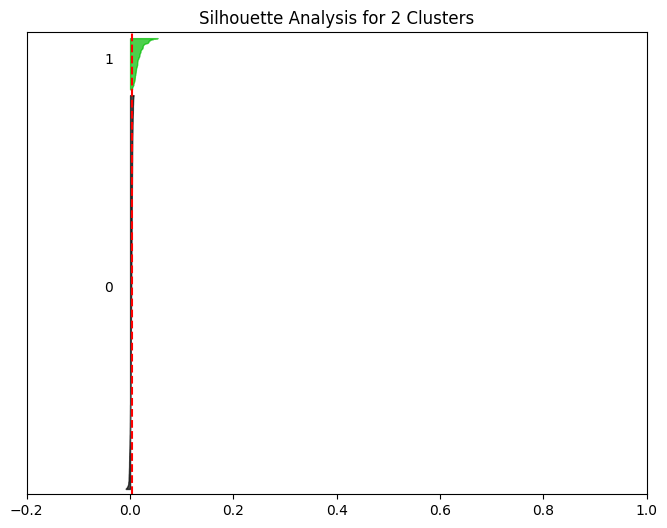

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


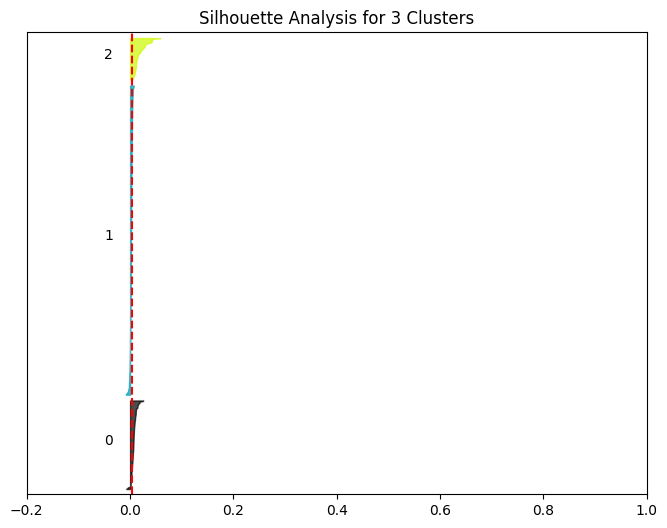

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


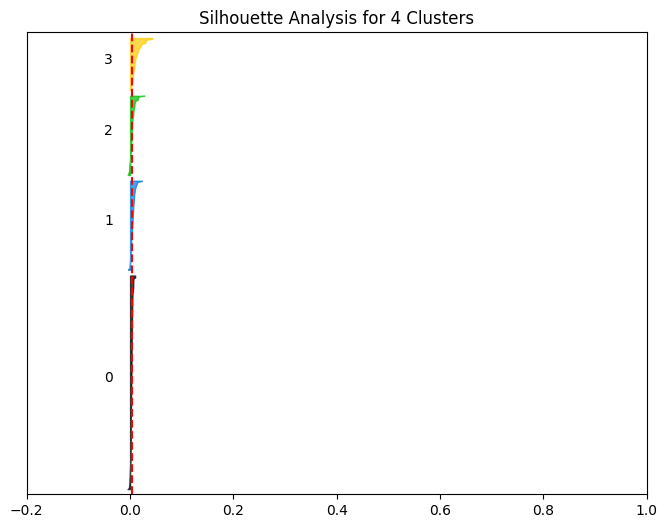

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


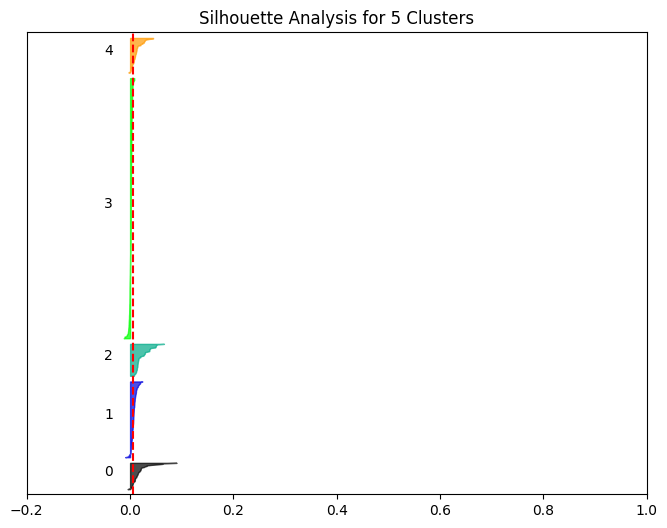

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


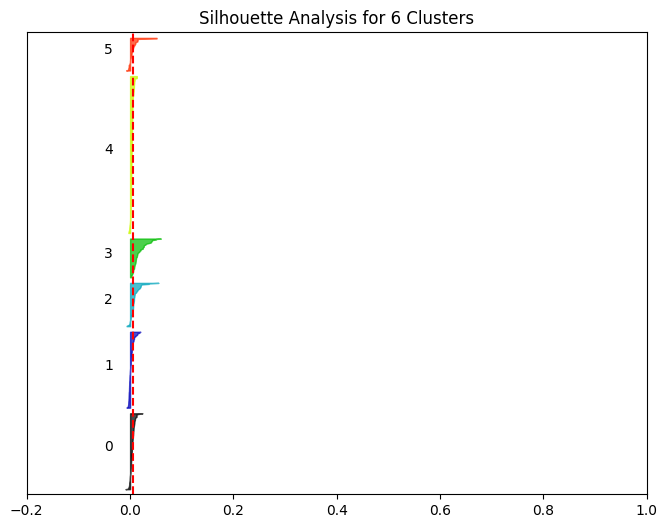

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


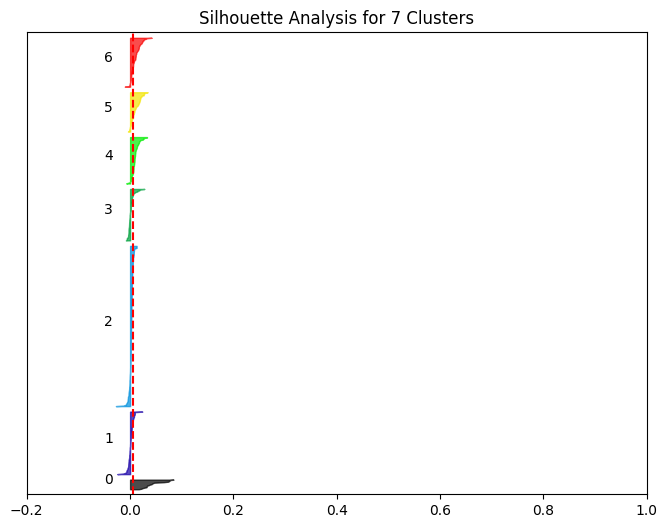

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


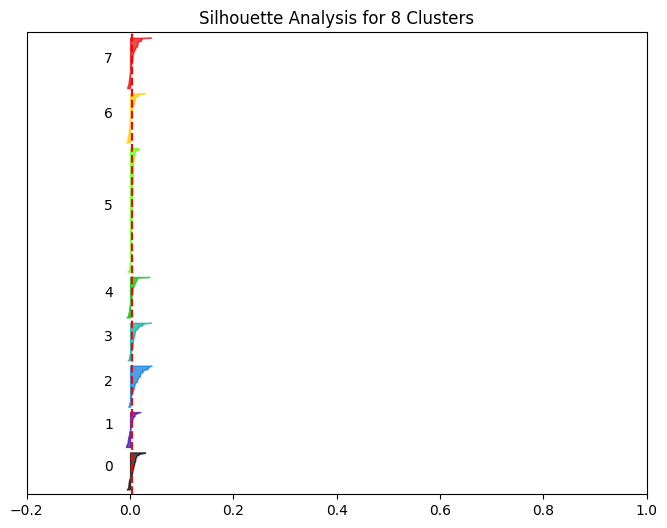

Average Silhouette Score for 5 clusters: 0.0055235367346684805
Average Silhouette Score for 7 clusters: 0.005079737693093046
Average Silhouette Score for 6 clusters: 0.004813465957999708
Average Silhouette Score for 8 clusters: 0.0044635507173075815
Average Silhouette Score for 4 clusters: 0.004165378617005449
Average Silhouette Score for 3 clusters: 0.004159495387665763
Average Silhouette Score for 2 clusters: 0.0034651779533982447


In [19]:
k = 8
kmeans_result = run_Kmeans(k,final_df)
silhouette(kmeans_result,final_df)


These scores provide insights into how well the clusters are formed for each number of clusters. Higher scores are desirable, indicating that the data points within a cluster are more similar to each other than to data points in other clusters. Based on these scores, you can assess which number of clusters might lead to more meaningful groupings in your poem dataset.


## Visualizing the distribution of words in each cluster



---

### Function: `plotWords(label, df, n_feats)`
Generates a bar plot of the most common words in a cluster.
- `label`: Cluster label.
- `df`: DataFrame with feature scores.
- `n_feats`: Number of top features to show.

### Function: `centroidsDict(centroids, index)`
Creates a dictionary of word scores from cluster centroids.
- `centroids`: Cluster centroids.
- `index`: Index of the cluster centroid.

### Function: `plotWordCloud(centroid_dict, title)`
Generates a word cloud from a dictionary of word scores.
- `centroid_dict`: Dictionary with word scores.
- `title`: Title of the word cloud.

### Function: `get_top_features_cluster(kmeansAlgo, tf_idf_array, prediction, n_feats)`
Retrieves top features for each cluster and visualizes them.
- `kmeansAlgo`: K-means algorithm.
- `tf_idf_array`: TF-IDF transformed data.
- `prediction`: Cluster predictions.
- `n_feats`: Number of top features.
- For each cluster:
  - Calculates average scores across the cluster.
  - Selects top features based on scores.
  - Creates a DataFrame with feature names and scores.
  - Calls `plotWords` to visualize top features.
  - Retrieves cluster centroids.
  - Creates a centroid dictionary using `centroidsDict`.
  - Calls `plotWordCloud` to visualize word cloud of cluster terms.

These functions work together to explore and visualize clusters formed by the K-means algorithm. They help us understand the content and themes of clustered poems through bar plots and word clouds, enhancing our interpretation of clustering results.

---

In [21]:
category_list = df['Genre'].to_numpy()

from collections import Counter

def plotWords(label,df,n_feats):
    plt.figure(figsize=(8, 6))
    plt.title(f"Most Common Words in Cluster {label}")
    sns.barplot(x = 'score' , y = 'features' , data = df[:n_feats])
    plt.show()

def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def plotWordCloud(centroid_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    wordcloud.generate_from_frequencies(centroid_dict)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def get_top_features_cluster(kmeansAlgo,tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        print("Lable:",label)
        id_temp = np.where(prediction==label) # indices for each cluster
        cate=category_list[id_temp[0]]
        value_counts = Counter(cate)
        print(value_counts)
        cluster_name = value_counts.most_common(1)[0][0]
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = feature_names
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        plotWords(cluster_name,df,n_feats)
        centroid = pd.DataFrame(kmeansAlgo.cluster_centers_)
        centroid.columns = final_df.columns
        centroid_dict = centroidsDict(centroid, int(label))
        plotWordCloud(centroid_dict, f"Cluster {cluster_name}")
    return dfs

Lable: 0
Counter({'Death': 125, 'Music': 117, 'Environment': 114, 'Affection': 55})


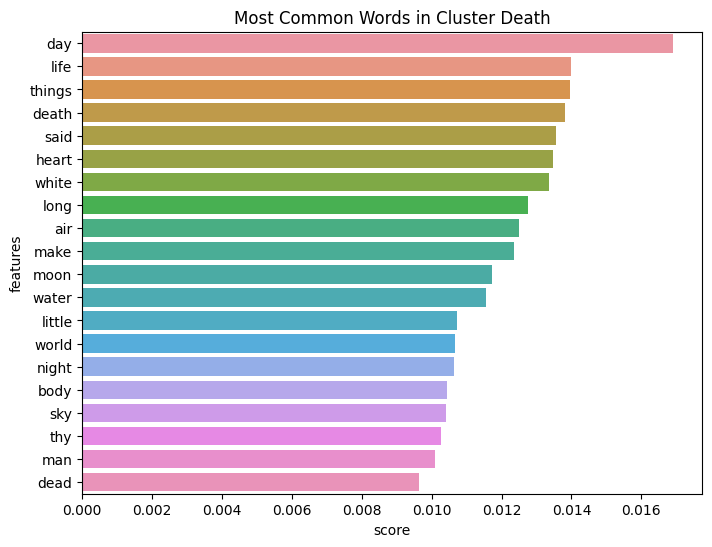

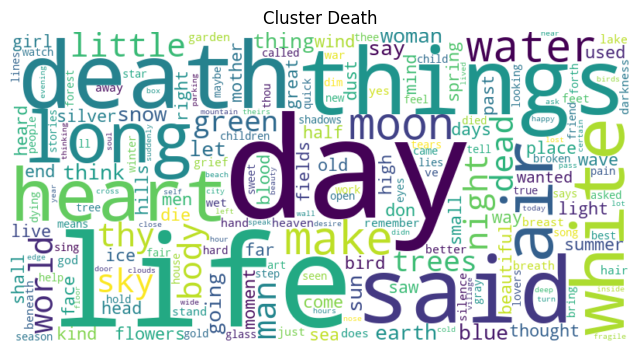

Lable: 1
Counter({'Environment': 64, 'Music': 47, 'Death': 40, 'Affection': 21})


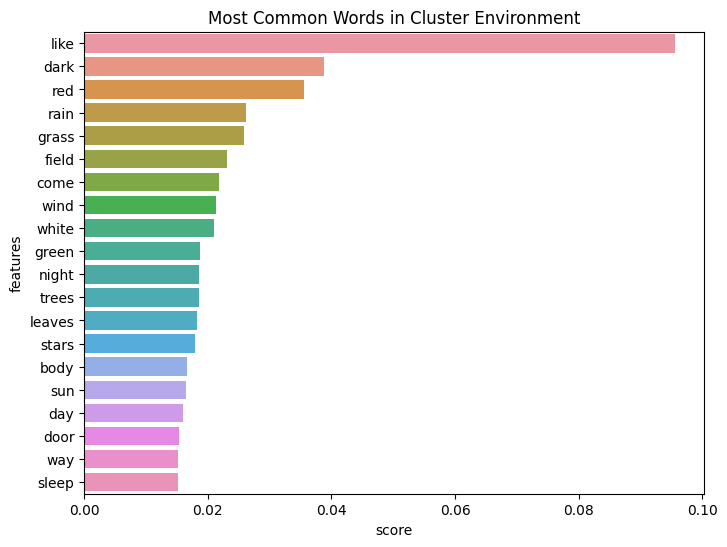

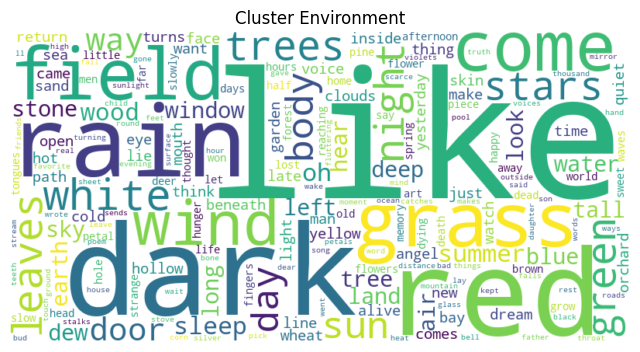

Lable: 2
Counter({'Music': 49, 'Death': 48, 'Affection': 28, 'Environment': 28})


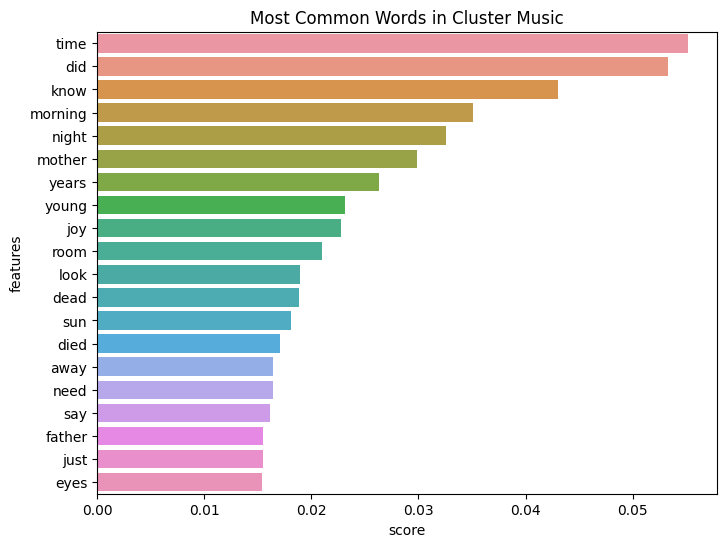

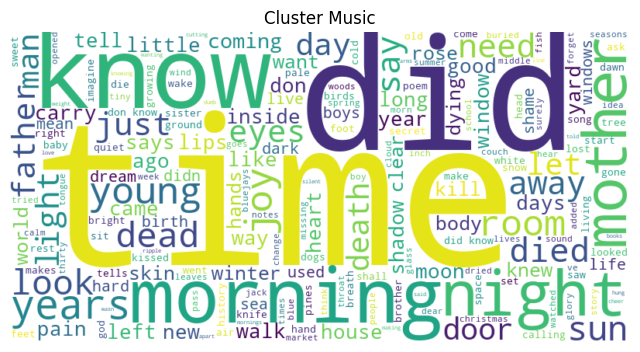

Lable: 3
Counter({'Affection': 37, 'Music': 25, 'Environment': 21, 'Death': 18})


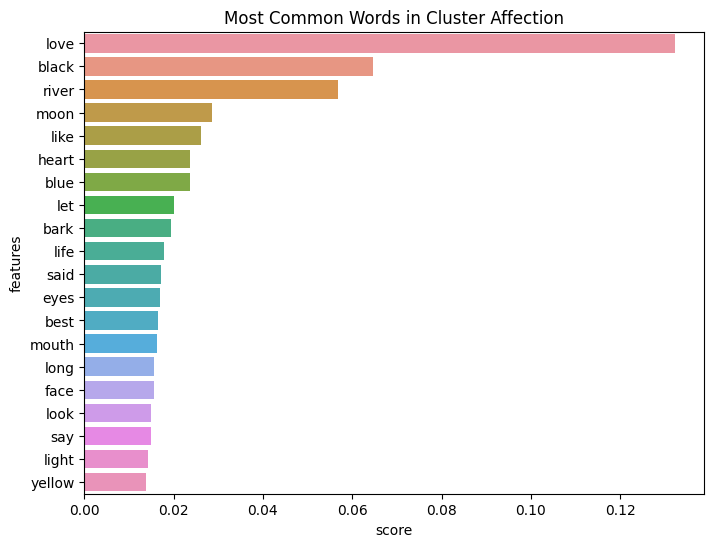

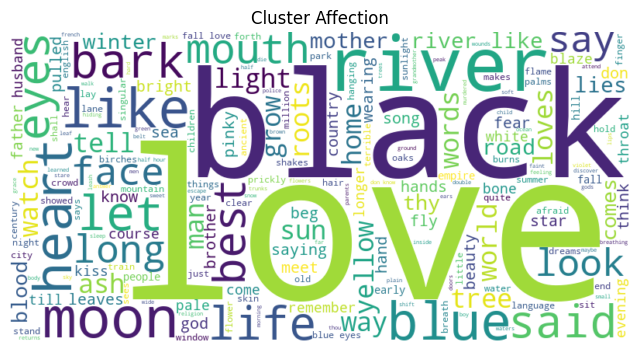

In [22]:
best_result = 4
kmeans = kmeans_result[best_result]

final_df_arr = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
#print(mean[res])
dfs = get_top_features_cluster(kmeans,final_df_arr,prediction,n_feats)